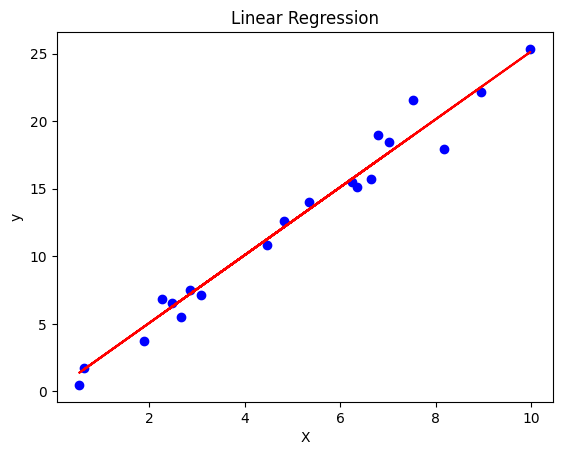

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate sample data
X = np.random.rand(100, 1) * 10  # Features
y = 2.5 * X + np.random.randn(100, 1)  # Targets with noise

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Plotting
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

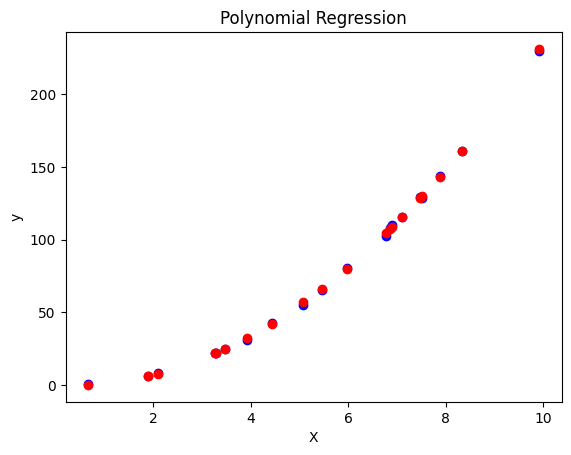

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Generate sample data
X = np.random.rand(100, 1) * 10  # Features
y = 2.5 * X**2 - 1.5 * X + np.random.randn(100, 1)  # Targets with noise

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Polynomial Features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predictions
y_pred = model.predict(X_test_poly)

# Plotting
plt.scatter(X_test, y_test, color='blue')
plt.scatter(X_test, y_pred, color='red')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [37]:
import pandas as pd

data = {'Color': ['Red', 'Blue', 'Green', 'Blue']}
df = pd.DataFrame(data)

df_encoded = pd.get_dummies(df, columns=['Color'], prefix='Color')

print(df_encoded)

   Color_Blue  Color_Green  Color_Red
0       False        False       True
1        True        False      False
2       False         True      False
3        True        False      False


In [38]:
import pandas as pd

data = {'Age': [23, 45, 18, 34, 67, 50, 21]}
df = pd.DataFrame(data)

bins = [0, 20, 40, 60, 100]
labels = ['0-20', '21-40', '41-60', '61+']

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

print(df)

   Age Age_Group
0   23     21-40
1   45     41-60
2   18      0-20
3   34     21-40
4   67       61+
5   50     41-60
6   21     21-40


In [39]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')


texts = ["This is a sample sentence.", "Text data preprocessing is important."]

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
vectorizer = CountVectorizer()


def preprocess_text(text):
    words = text.split()
    words = [stemmer.stem(word)
             for word in words if word.lower() not in stop_words]
    return " ".join(words)


cleaned_texts = [preprocess_text(text) for text in texts]

X = vectorizer.fit_transform(cleaned_texts)

print("Cleaned Texts:", cleaned_texts)
print("Vectorized Text:", X.toarray())

Cleaned Texts: ['sampl sentence.', 'text data preprocess important.']
Vectorized Text: [[0 0 0 1 1 0]
 [1 1 1 0 0 1]]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rushikesava.b\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
import pandas as pd

data = {'Full_Address': [
    '123 Elm St, Springfield, 12345', '456 Oak Rd, Shelbyville, 67890']}
df = pd.DataFrame(data)

df[['Street', 'City', 'Zipcode']] = df['Full_Address'].str.extract(
    r'([0-9]+\s[\w\s]+),\s([\w\s]+),\s(\d+)')

print(df)

                     Full_Address      Street         City Zipcode
0  123 Elm St, Springfield, 12345  123 Elm St  Springfield   12345
1  456 Oak Rd, Shelbyville, 67890  456 Oak Rd  Shelbyville   67890


In [41]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

from sklearn.metrics import precision_score,\
recall_score, f1_score, accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

# Holdout method.Dividing the data into train and test
X_train, X_test,\
    y_train, y_test = train_test_split(X, y,
                                       random_state=20,
                                       test_size=0.20)
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print("Accuracy:", accuracy_score(y_test,
                                  y_pred))

Accuracy: 0.9333333333333333


In [42]:
print("Precision:", precision_score(y_test,
                                    y_pred,
                                    average="weighted"))

print('Recall:', recall_score(y_test,
                              y_pred,
                              average="weighted"))

Precision: 0.9435897435897436
Recall: 0.9333333333333333


In [43]:
# calculating f1 score
print('F1 score:', f1_score(y_test, y_pred,
                            average="weighted"))

F1 score: 0.9327777777777778


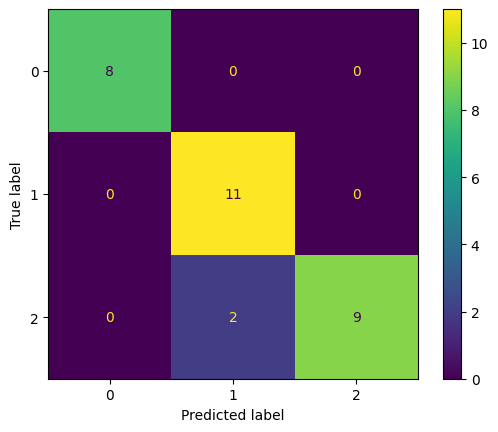

In [44]:
confusion_matrix = metrics.confusion_matrix(y_test,
                                            y_pred)

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix,
    display_labels=[0, 1, 2])

cm_display.plot()
plt.show()